### DSP Project on Rating System for Customer's Reviews of on Products 

#### The Model Build-Up

##### Amazon Dataset: https://nijianmo.github.io/amazon/index.html#code

## Import the libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
import json

In [4]:
dataPath = '/Users/OLALYTICS/dsp-final-project/data/'

dataset_name = 'Amazon_Kindle_Store.json'

In [5]:
data = []

with open(dataPath + dataset_name) as f:
    
    for line in f:
        
        json_data = json.loads(line)
        
        data.append(json_data)
    

In [11]:
df1 = pd.DataFrame(data)

In [12]:
# Selecting 30% of the dataset to boost the running time while loading

review_dataset = df1.sample(frac = 0.3, random_state = 42)

# Resetting the index of the 10% sample DataFrame

review_dataset.reset_index(drop = True, inplace = True)

In [13]:
review_dataset.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,False,"12 13, 2013",A30SHRDUQFXF6V,B00FPZ53PW,{'Format:': ' Kindle Edition'},Steve Bureau,"Wow, there is a ton of content there! 52 pages...",A lot of content,1386892800,NaN,NaN
1,5.0,True,"10 8, 2016",A3OCKJ3WL1IVRI,B01H2XPLB0,{'Format:': ' Kindle Edition'},ckc,Ah here we go again. New season New characters...,The Wifey'$ are back,1475884800,NaN,NaN
2,5.0,False,"08 17, 2015",A3DVTU6BUBAC6,B00XVC88VC,{'Format:': ' Kindle Edition'},Jaime,"My god! Conscience, the 2nd installment in Cec...",FANTASTIC 2nd installment!!!!!,1439769600,6,NaN
3,5.0,True,"05 27, 2015",A175GM0AGKEBBF,B00UZKS8V8,{'Format:': ' Kindle Edition'},Teresa M Palombi,"OMG, I wanted more",Five Stars,1432684800,NaN,NaN
4,5.0,True,"03 10, 2015",AHPYP1RPIJ7TU,B00O6KVFC2,{'Format:': ' Kindle Edition'},randy atkins,Good read all the way throughout,Five Stars,1425945600,NaN,NaN


#### Exploratory Data Analysis

In [14]:
review_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666895 entries, 0 to 666894
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         666895 non-null  float64
 1   verified        666895 non-null  bool   
 2   reviewTime      666895 non-null  object 
 3   reviewerID      666895 non-null  object 
 4   asin            666895 non-null  object 
 5   style           651355 non-null  object 
 6   reviewerName    666850 non-null  object 
 7   reviewText      666783 non-null  object 
 8   summary         666425 non-null  object 
 9   unixReviewTime  666895 non-null  int64  
 10  vote            87400 non-null   object 
 11  image           432 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 56.6+ MB


In [19]:
import seaborn as sns

<Axes: xlabel='overall', ylabel='count'>

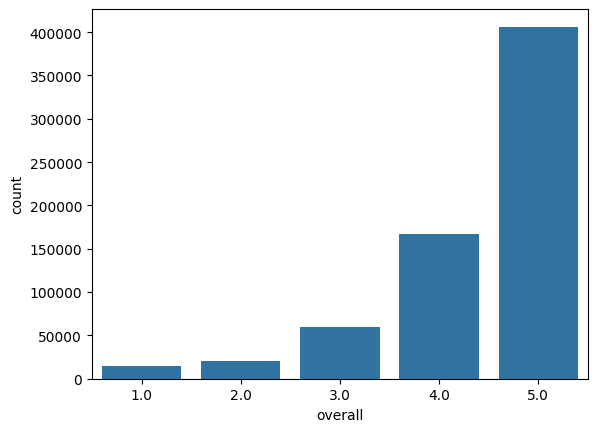

In [20]:
sns.countplot(x = 'overall', data = review_dataset)

<Axes: xlabel='verified', ylabel='count'>

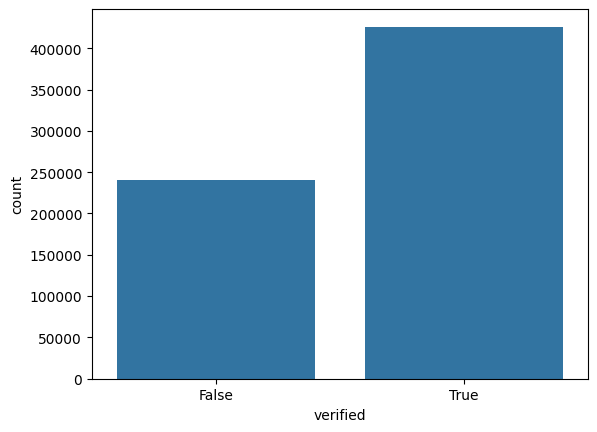

In [21]:
sns.countplot(x = 'verified', data = review_dataset)

### interested columns: `reviewText and overall`

In [22]:
data_df = review_dataset[['reviewText','overall']]

data_df.head()

,reviewText,overall
0,"Wow, there is a ton of content there! 52 pages...",4.0
1,Ah here we go again. New season New characters...,5.0
2,"My god! Conscience, the 2nd installment in Cec...",5.0
3,"OMG, I wanted more",5.0
4,Good read all the way throughout,5.0


In [23]:
data_df.sample(5)

,reviewText,overall
96676,This series must be read in order. The first b...,5.0
550586,"Like someone else mentioned, I too paid more t...",1.0
69765,Im finding information about relieving stress ...,4.0
272702,It was fun and held my interest. Not my very ...,5.0
273451,.I love how the author created the characters ...,5.0


In [24]:
data_df['overall'].value_counts()

overall
5.0    406286
4.0    166700
3.0     59324
2.0     20187
1.0     14398
Name: count, dtype: int64

### Data Preprocessing

In [26]:
from bs4 import BeautifulSoup

from unidecode import unidecode

import re

def clean_text(text):
    
    text = str(text).lower().replace('\\', '').replace('_', ' ')
    #text = contractions.fix(text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    text = unidecode(text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub("(.)\\1{2,}", "\\1", text)
                        
    return text

In [27]:
data_df['reviewText'] = data_df['reviewText'].apply(lambda text: clean_text(text))

/var/folders/c6/ht4lr6411jqdn8bhdr_m1dh00000gp/T/ipykernel_93251/2549876200.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')
/var/folders/c6/ht4lr6411jqdn8bhdr_m1dh00000gp/T/ipykernel_93251/1075072618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['reviewText'] = data_df['reviewText'].apply(lambda text: clean_text(text))


In [28]:
data_df.head()

,reviewText,overall
0,wow there is a ton of content there 52 pages i...,4.0
1,ah here we go again new season new characters ...,5.0
2,my god conscience the 2nd installment in cecil...,5.0
3,omg i wanted more,5.0
4,good read all the way throughout,5.0


### Training the model

##### Term Frequency - Inverse Document Frequency(TFIDF) and Linear Support Vector Machine(SVM)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report

In [30]:
tfidf = TfidfVectorizer(max_features = None, ngram_range = (1,3), analyzer = 'char')

In [31]:
tfidf.fit(data_df['reviewText'])

TfidfVectorizer(analyzer='char', ngram_range=(1, 3))

#### Features selection 

In [32]:
X = tfidf.transform(data_df['reviewText'])

In [33]:
y = data_df['overall']

In [34]:
X.shape, y.shape

((666895, 25079), (666895,))

In [35]:
# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [36]:
X_train.shape

(500171, 25079)

In [ ]:
# Model fitting using LinearSVC

In [37]:
# Initializing the model

LinSVC = LinearSVC(C = 20, class_weight = 'balanced') 

In [38]:
LinSVC.fit(X_train, y_train)

/Users/OLALYTICS/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=20, class_weight='balanced')

In [39]:
predicted_rating = LinSVC.predict(X_test)

predicted_rating

array([1., 3., 5., ..., 5., 3., 3.])

In [ ]:
# classification report for model performance

In [40]:
print(classification_report(y_test, predicted_rating))

              precision    recall  f1-score   support

         1.0       0.30      0.53      0.39      3672
         2.0       0.22      0.41      0.29      5053
         3.0       0.35      0.44      0.39     14698
         4.0       0.49      0.33      0.39     41692
         5.0       0.79      0.82      0.81    101609

    accuracy                           0.64    166724
   macro avg       0.43      0.50      0.45    166724
weighted avg       0.65      0.64      0.64    166724



#### Testing the Prediction Rating based on customer's review

In [50]:
text_entry = input('Please provide your reviews: ')

text_entry = clean_text(text_entry)

text_transformed = tfidf.transform([text_entry])


print('\nThe predicted overall rating is: ', LinSVC.predict(text_transformed))

Please provide your reviews: This is a bad book

The predicted overall rating is:  [1.]


### loading model to pickle

In [41]:
import pickle

In [42]:
with open('dsp_project_model.pkl', 'wb') as file:
    pickle.dump(LinSVC, file)

In [ ]:
with open('dsp_project_tfidf_model.pkl', 'wb') as file:
    pickle.dump(LinSVC, file)

In [43]:
# reading the pickle file

# import pickle

# with open('dsp_project_model.pkl', 'rb') as file:
    #clf = pickle.load(file)

# predict with it

#predictions = clf.predict([['this product is good']])

#predictions
